In [43]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Задание 1

Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Задание 2

Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 3

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

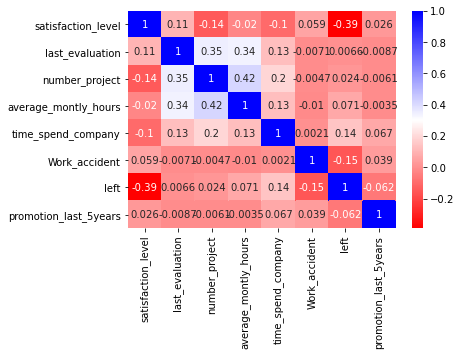

In [15]:
sns.heatmap(df.corr(), cmap="bwr_r", annot=True)

Две самые скоррелирование переменные - number_project и average_montly_hours, наименее скоррелированные -time_spend_company и work_accident 

### Задание 4

Рассчитайте сколько сотрудников работает в каждом департаменте

In [16]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Задание 5

Показать распределение сотрудников по зарплатам.

In [20]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

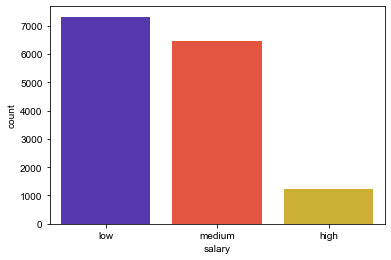

In [21]:
sns.countplot(x='salary', data=df, palette="CMRmap")
sns.set_style("whitegrid")
plt.show()

### Задание 6

Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [44]:
df.groupby('department')['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

<AxesSubplot:xlabel='department'>

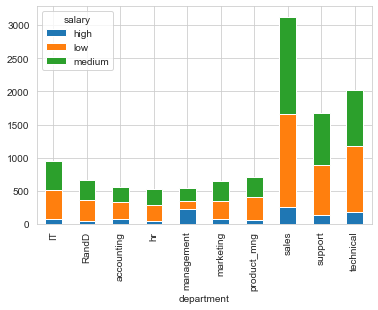

In [45]:
pd.pivot_table(df[df.left == 0], values='left', index='department', 
               columns='salary', aggfunc='count').plot(kind='bar', stacked=True)

### Задание 7

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Допустим, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. применим дисперсионный анализ для проверки этой гипотизы, положим уровень значимости равным 0,05.

In [46]:
high = df.loc[df.salary == 'high']['average_montly_hours']
medium = df.loc[df.salary == 'medium']['average_montly_hours']
low = df.loc[df.salary == 'low']['average_montly_hours']

fvalue, pvalue = stats.f_oneway(high, medium, low)
print(fvalue, pvalue)

0.4583624407867663 0.6323271153144614


получили p-value 0.63, что значительно превышает принятый уровень значимости, таким образом, мы не можем отвергнуть гипотезу и признать отличия между выборками статистически значимыми, т.е. уровень оклада не связан со средней величиной времени, проводимого на работе.

Визуализируем выборки и убедимся, что распределения схожи

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

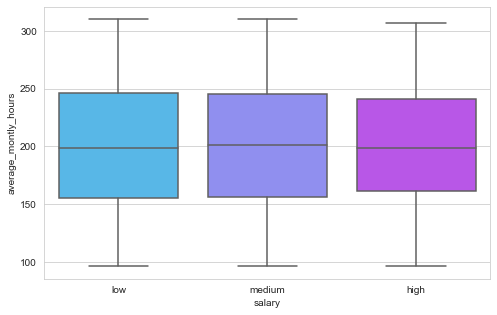

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='salary', y='average_montly_hours', palette='cool')

### Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [40]:
employees_with_promotion_left = len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]) / len(df[(df['left'] == 1)])
employees_with_promotion_stayed = len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]) / len(df[(df['left'] == 0)])
print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся: {employees_with_promotion_left:.2%}')
print(f'Доля сотрудников с повышением за последние 5 лет среди оставшихся: {employees_with_promotion_stayed:.2%}')

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди оставшихся: 2.63%


In [47]:
# средняя сьеперь удовлетворенности среди уволившихся 
# и неуволившихся сотрудников
df.groupby('left').mean()[['satisfaction_level']]

,satisfaction_level
left,
0,0.666810
1,0.440098


In [48]:
# Среднее количество проектов среди уволившихся и неуволившихся сотрудников:
df.groupby('left').mean()[['number_project']]

,number_project
left,
0,3.786664
1,3.855503
